In [1]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import math as m
import scipy.constants as const
import lmfit
from scipy.signal import argrelextrema

In [2]:
with open('Data/Aufg_5.4.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 729900


data = f.channel_to_pos(data,cal)

In [3]:
data[1] = data[1]*10
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.030193000793083763


In [4]:
localmax = argrelextrema(data[1], np.greater,order=35)
localmin = argrelextrema(data[1], np.less,order=35)

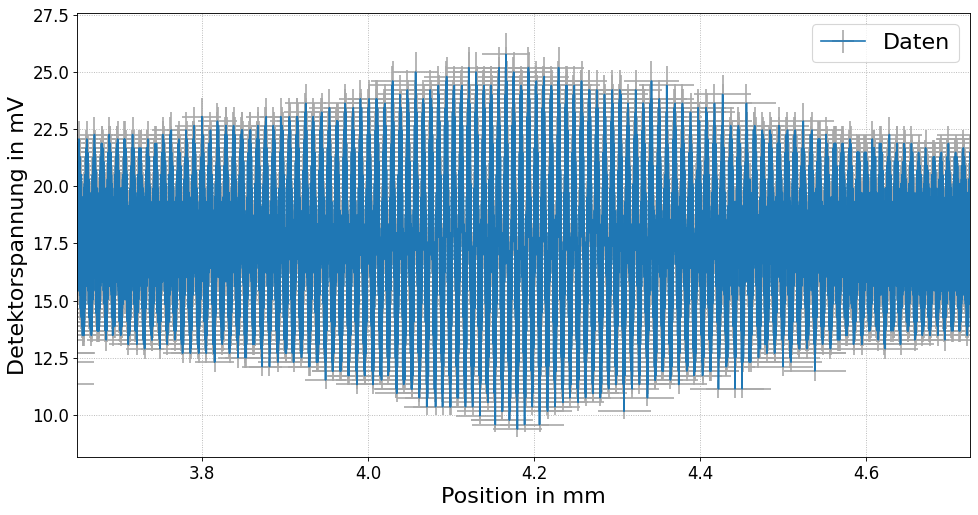

In [5]:
f.figsize(2)
plt.errorbar(data[0],data[1],yerr=yerr,xerr=data[2],label = 'Daten',ecolor='darkgray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
f.form([3.650,4.725],xlabel='Position in mm',ylabel='Detektorspannung in mV')

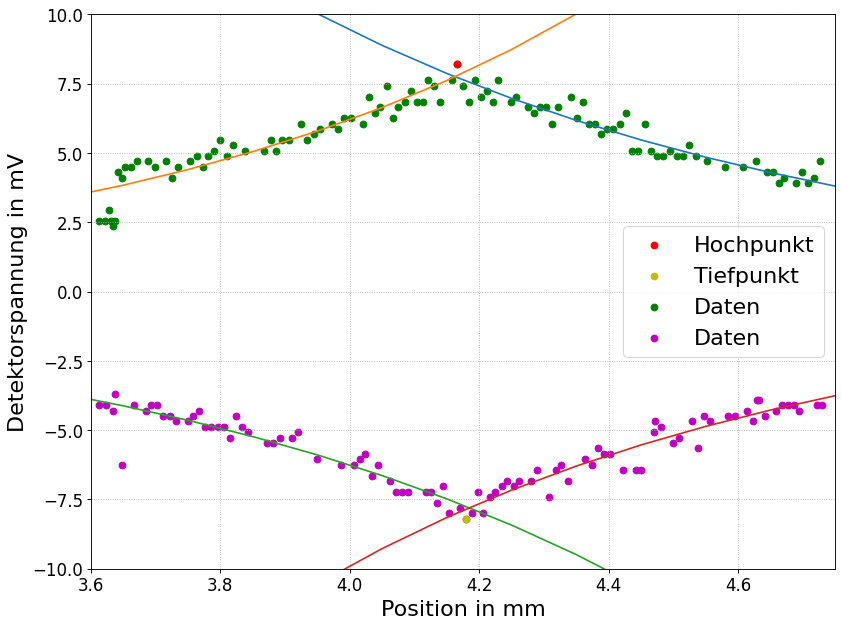

1.467
1.5330000000000004
1.5000000000000002


In [6]:
data[1] -= np.mean(data[1])

von , bis = f.pos(data[0],3.6),f.pos(data[0],4.7)

amp1, amp2 = data[1][localmax][von:bis], data[1][localmin][von:bis]
xamp1, xamp2 = data[0][localmax][von:bis], data[0][localmin][von:bis]

peako = argrelextrema(amp1, np.greater,order=10)[0][0]
peaku = argrelextrema(amp2, np.less,order=30)[0][0]

 

resor = f.expfit(amp1[peako:-1],xamp1[peako:-1],np.full(len(amp1[peako:-1]),0.1))
resol = f.expfit(amp1[0:peako],xamp1[0:peako],np.full(len(amp1[0:peako]),0.1))

resul = f.expfit(amp2[0:peaku],xamp2[0:peaku],np.full(len(amp2[0:peaku]),0.1))
resur = f.expfit(amp2[peaku:-1],xamp2[peaku:-1],np.full(len(amp2[peaku:-1]),0.1))

f.figsize(1)

plt.plot(np.arange(3.25,5,0.1),resor.eval(x=np.arange(3.25,5,0.1)))
plt.plot(np.arange(3.25,5,0.1),resol.eval(x=np.arange(3.25,5,0.1)))
plt.plot(np.arange(3.25,5,0.1),resul.eval(x=np.arange(3.25,5,0.1)))
plt.plot(np.arange(3.25,5,0.1),resur.eval(x=np.arange(3.25,5,0.1)))

plt.scatter(xamp1[peako],amp1[peako],color='r',zorder=10,label='Hochpunkt')
plt.scatter(xamp2[peaku],amp2[peaku],color='y',zorder=10,label='Tiefpunkt')


plt.scatter(xamp1,amp1,color='g',label='Daten')
plt.scatter(xamp2,amp2,color='m',label='Daten')

plt.ylim(-10,10)
plt.xlim(3.6,4.75)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


f.form(xlabel='Position in mm',ylabel='Detektorspannung in mV')


for i in np.arange(0,10,0.001):
    if resor.eval(x=i) <= amp1[peako]/np.e:
        orbreit=i
        break
for i in np.arange(0,10,0.001):
    if resol.eval(x=i) >= amp1[peako]/np.e:
        olbreit=i
        break
for i in np.arange(0,10,0.001):
    if resul.eval(x=i) <= amp2[peaku]/np.e:
        ulbreit=i
        break
for i in np.arange(0,10,0.001):
    if resur.eval(x=i) >= amp2[peaku]/np.e:
        urbreit=i
        break


print(np.mean([orbreit-olbreit,urbreit-ulbreit]))